In [199]:
# sns언급량만 독립변수로 한 방문자 수 예측

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
df_sns = pd.read_csv('./data/sns언급량.csv', encoding='utf-8-sig')

print(df_sns.head())  

   year  month Province City Location  Search_Volume
0  2024      1     충청남도  공주시      NaN          20466
1  2024      2     충청남도  공주시      NaN          21763
2  2024      3     충청남도  공주시      NaN          23553
3  2024      4     충청남도  공주시      NaN          26274
4  2024      5     충청남도  공주시      NaN          29286


In [202]:
df_visitors = pd.read_csv('./data/충청도연도별방문자추이.csv', encoding='utf-8-sig')

print(df_visitors.head())  

      축제명     도  시군구  읍면동  개최년도  시작월  종료월  축체기간(일)  (현지인)방문자수  (외지인)방문자수  ...  \
0  강경젓갈축제  충청남도  논산시  강경읍  2018   10   10        5      50642      59291  ...   
1  강경젓갈축제  충청남도  논산시  강경읍  2022   10   10        5      57971      69910  ...   
2  강경젓갈축제  충청남도  논산시  강경읍  2023   10   10        4      52282      71999  ...   
3  괴산고추축제  충청북도  괴산군  괴산읍  2018    8    9        4      38254      53578  ...   
4  괴산고추축제  충청북도  괴산군  괴산읍  2019    8    9        4      39975      70971  ...   

   (전체)방문자수  일평균 방문자수  전년도 일평균 방문자수  일평균 방문자수 증감률  (이전)전체방문자  (전체)방문자증감  \
0    110041  22008.20           NaN           NaN        NaN     110041   
1    127900  25580.00      22008.20          16.2   110041.0      17859   
2    124299  31074.75      25580.00          21.5   127900.0      -3601   
3     91907  22976.75           NaN           NaN        NaN      91907   
4    111098  27774.50      22976.75          20.9    91907.0      19191   

   (현지인)방문자비율  (외지인)방문자비율  (외국인)방문자비율  전년대비방문자증감비율  
0       4

In [203]:
print(df_sns.info())
print("=========================")
print(df_visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           829 non-null    int64 
 1   month          829 non-null    int64 
 2   Province       829 non-null    object
 3   City           829 non-null    object
 4   Location       140 non-null    object
 5   Search_Volume  829 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 39.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   축제명           43 non-null     object 
 1   도             43 non-null     object 
 2   시군구           43 non-null     object 
 3   읍면동           43 non-null     object 
 4   개최년도          43 non-null     int64  
 5   시작월           43 non-null     int64  
 6   종료월           43 non-null     int64  
 7   축

In [204]:
# 데이터 병합을 위한 컬럼 이름 통일 (df_visitors 기준으로 변경)
df_sns.rename(columns={"year": "개최년도", "City": "시군구", "Search_Volume": "SNS_언급량"}, inplace=True)


In [205]:
df_sns.head(5)

,개최년도,month,Province,시군구,Location,SNS_언급량
0,2024,1,충청남도,공주시,NaN,20466
1,2024,2,충청남도,공주시,NaN,21763
2,2024,3,충청남도,공주시,NaN,23553
3,2024,4,충청남도,공주시,NaN,26274
4,2024,5,충청남도,공주시,NaN,29286


In [206]:
# 데이터 병합
merged_df = pd.merge(df_visitors, df_sns, on=["개최년도", "시군구"], how="inner")

In [207]:
print(merged_df.head())
print(merged_df.info())

      축제명     도  시군구  읍면동  개최년도  시작월  종료월  축체기간(일)  (현지인)방문자수  (외지인)방문자수  ...  \
0  강경젓갈축제  충청남도  논산시  강경읍  2022   10   10        5      57971      69910  ...   
1  강경젓갈축제  충청남도  논산시  강경읍  2022   10   10        5      57971      69910  ...   
2  강경젓갈축제  충청남도  논산시  강경읍  2022   10   10        5      57971      69910  ...   
3  강경젓갈축제  충청남도  논산시  강경읍  2022   10   10        5      57971      69910  ...   
4  강경젓갈축제  충청남도  논산시  강경읍  2022   10   10        5      57971      69910  ...   

   (이전)전체방문자  (전체)방문자증감  (현지인)방문자비율  (외지인)방문자비율  (외국인)방문자비율  전년대비방문자증감비율  \
0   110041.0      17859       45.33       54.66        0.01        16.23   
1   110041.0      17859       45.33       54.66        0.01        16.23   
2   110041.0      17859       45.33       54.66        0.01        16.23   
3   110041.0      17859       45.33       54.66        0.01        16.23   
4   110041.0      17859       45.33       54.66        0.01        16.23   

   month  Province  Location  SNS_언급량  
0      1      충청

In [208]:
select_columns = ["개최년도", "도", "시군구", "SNS_언급량", "(전체)방문자수"]
merged_df = merged_df[select_columns]

In [209]:
select_columns

['개최년도', '도', '시군구', 'SNS_언급량', '(전체)방문자수']

In [210]:
merged_df.isnull().sum()

개최년도        0
도           0
시군구         0
SNS_언급량     0
(전체)방문자수    0
dtype: int64

In [211]:
# 상관관계 분석
correlation = merged_df[["SNS_언급량", "(전체)방문자수"]].corr()
print(correlation)


           SNS_언급량  (전체)방문자수
SNS_언급량   1.000000  0.016257
(전체)방문자수  0.016257  1.000000


In [212]:
# 상관관계 분석 결과 sns언급량과 전체 방문자수 간에 선형적인 연관성은 거의 없어 보임.
# 따라서 비선형 모델 사용

In [213]:
# 정규화
from sklearn.preprocessing import StandardScaler

# 정규화할 독립 변수
X = merged_df[["SNS_언급량"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("정규화된 데이터")
print(X_scaled[:5]) 


정규화된 데이터
[[-0.7530556 ]
 [-0.71118494]
 [-0.68954233]
 [-0.76196726]
 [-0.29205394]]


In [214]:
from sklearn.model_selection import train_test_split

# 종속 변수 설정
y = merged_df["(전체)방문자수"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [215]:
print("학습용 데이터 크기:", X_train.shape)
print("테스트용 데이터 크기:", X_test.shape)

학습용 데이터 크기: (336, 1)
테스트용 데이터 크기: (84, 1)


In [216]:
merged_df

,개최년도,도,시군구,SNS_언급량,(전체)방문자수
0,2022,충청남도,논산시,6159,127900
1,2022,충청남도,논산시,6455,127900
2,2022,충청남도,논산시,6608,127900
3,2022,충청남도,논산시,6096,127900
4,2022,충청남도,논산시,9418,127900
...,...,...,...,...,...
415,2023,충청남도,서천군,8035,30030
416,2023,충청남도,서천군,8256,30030
417,2023,충청남도,서천군,7586,30030
418,2023,충청남도,서천군,6708,30030


In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE:", mse_rf)
print("R-squared:", r2_rf)

MSE: 132160319540.76683
R-squared: -0.666615872327804


In [218]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

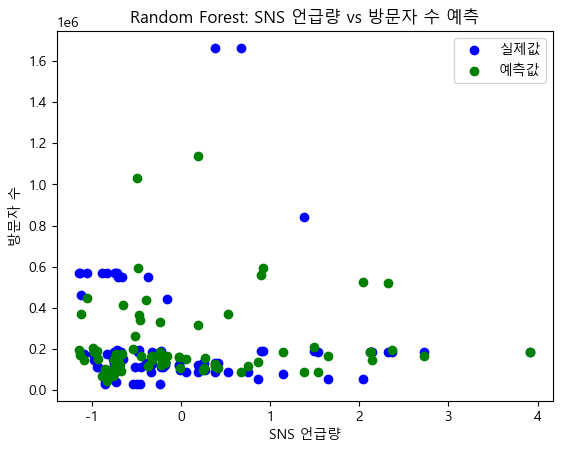

In [219]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color="blue", label="실제값")
plt.scatter(X_test, y_pred_rf, color="green", label="예측값")
plt.xlabel("SNS 언급량")
plt.ylabel("방문자 수")
plt.title("Random Forest: SNS 언급량 vs 방문자 수 예측")
plt.legend()
plt.show()


In [220]:
# 랜덤 포레스트 모델은 sns언급량만으로는 방문자수를 잘 예측하지 못하고 있음
# 방문자 수에 영향을 미치는 변수가 부족한 것도 원인일 수 있음

In [221]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 학습
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# 예측
y_pred = gb_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 108091426272.50984
R-squared: -0.3630936071756883


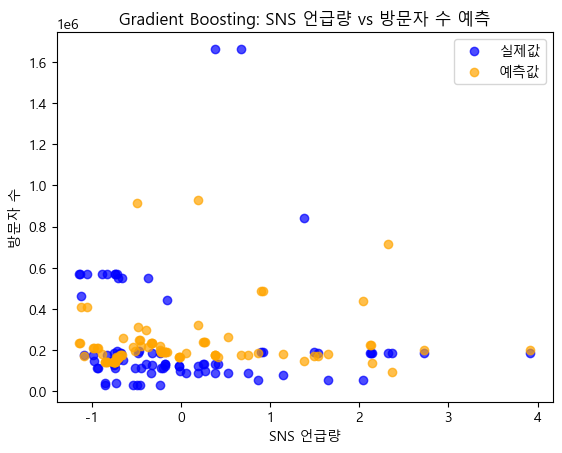

In [222]:
# 실제값과 예측값을 서로 다른 색상으로 시각화
plt.scatter(X_test, y_test, color="blue", label="실제값", alpha=0.7)
plt.scatter(X_test, y_pred, color="orange", label="예측값", alpha=0.7)

# 그래프 설정
plt.xlabel("SNS 언급량")
plt.ylabel("방문자 수")
plt.title("Gradient Boosting: SNS 언급량 vs 방문자 수 예측")
plt.legend()
plt.show()


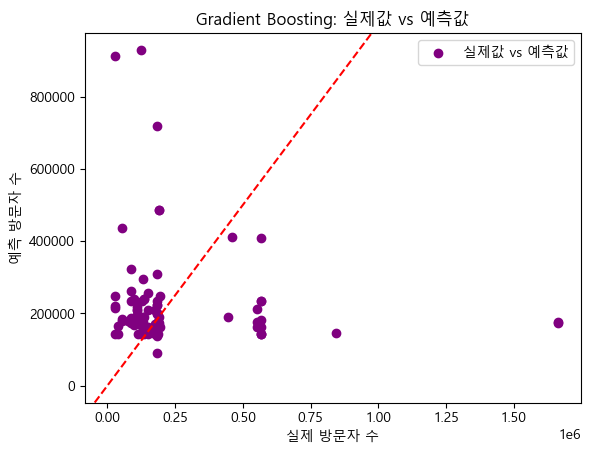

In [223]:
plt.scatter(y_test, y_pred, color="purple", label="실제값 vs 예측값")
plt.xlabel("실제 방문자 수")
plt.ylabel("예측 방문자 수")
plt.title("Gradient Boosting: 실제값 vs 예측값")
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.legend()
plt.show()

In [224]:
# 데이터 분리
X = merged_df[["SNS_언급량"]]  # 독립 변수
y = merged_df["(전체)방문자수"]  # 종속 변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [225]:
# 차원 확인
print("X_test['SNS_언급량'] 차원:", X_test["SNS_언급량"].shape)
print("y_test 차원:", y_test.shape)
print("y_pred 차원:", y_pred.shape)

X_test['SNS_언급량'] 차원: (84,)
y_test 차원: (84,)
y_pred 차원: (84,)


In [ ]:
# 2024년 데이터를 생성
next_year = 2024
future_data = pd.DataFrame({
    "개최년도": [next_year] * len(merged_df["시군구"].unique()),
    "SNS_언급량": merged_df["SNS_언급량"].mean(),  # 평균 SNS 언급량 사용
    "시군구": merged_df["시군구"].unique()
})

# 시군구와 개최년도 One-Hot Encoding
future_data = pd.get_dummies(future_data, columns=["시군구", "개최년도"])

# 학습 데이터와 컬럼 정렬 일치
future_data = future_data.reindex(columns=X_train.columns, fill_value=0)

# 예측 수행 (Random Forest)
future_predictions_rf = rf_model.predict(future_data)

# 예측 수행 (Gradient Boosting)
future_predictions_gb = model.predict(future_data)

# 결과 데이터프레임 생성
future_results = pd.DataFrame({
    "개최년도": [next_year] * len(merged_df["시군구"].unique()),
    "시군구": merged_df["시군구"].unique(),
    "예측 방문자 수 (Random Forest)": future_predictions_rf,
    "예측 방문자 수 (Gradient Boosting)": future_predictions_gb
})

# 결과 출력
print(future_results.head())

   개최년도  시군구  예측 방문자 수 (Random Forest)  예측 방문자 수 (Gradient Boosting)
0  2024  논산시                  183994.0                 167745.762552
1  2024  괴산군                  183994.0                 167745.762552
2  2024  금산군                  183994.0                 167745.762552
3  2024  보령시                  183994.0                 167745.762552
4  2024  서산시                  183994.0                 167745.762552
결과가 'future_visitors_predictions_2024.csv' 파일로 저장되었습니다.


c:\Users\carpe\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
